In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:
raw_energies = te.fetchMarkets(symbol=['PNL:COM','XB1:COM','NG1:COM'], initDate='2019-01-01', output_type='df')

In [4]:
raw_propane_data = raw_energies.loc[raw_energies['symbol'] == 'PNL:COM']
raw_gasoline_data = raw_energies.loc[raw_energies['symbol'] == 'XB1:COM']
raw_ngas_data = raw_energies.loc[raw_energies['symbol'] == 'NG1:COM']

propane = raw_propane_data[['close']].rename(columns={'close': 'Propane'})
propane.index.name = 'Date'

gasoline = raw_gasoline_data[['close']].rename(columns={'close': 'Gasoline'})
gasoline.index.name = 'Date'

ngas = raw_ngas_data[['close']].rename(columns={'close': 'Natural Gas'})
ngas.index.name = 'Date'

df = pd.merge(pd.merge(propane,gasoline, on='Date'),ngas, on='Date')
df

,Propane,Gasoline,Natural Gas
Date,,,
2021-06-24,0.9671,2.2809,3.418
2021-06-23,0.9644,2.2669,3.333
2021-06-22,0.9577,2.2243,3.258
2021-06-21,0.9557,2.1969,3.191
2021-06-18,0.9519,2.1683,3.215
...,...,...,...
2019-01-08,0.6291,1.3626,2.967
2019-01-07,0.6221,1.3408,2.944
2019-01-04,0.6375,1.3478,3.044


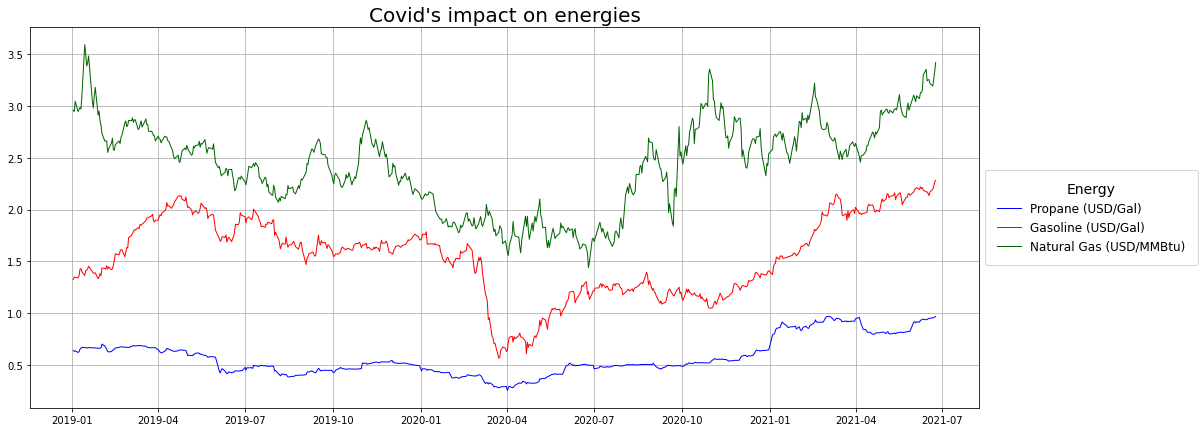

In [5]:
plt.subplots(figsize=(17, 7))

plt.plot( df.index.tolist(), df['Propane'].values.tolist(),marker='', color='blue', linewidth=1, label="Propane (USD/Gal)")
plt.plot( df.index.tolist(), df['Gasoline'].values.tolist(), marker='', color='red', linewidth=1, label="Gasoline (USD/Gal)")
plt.plot( df.index.tolist(), df['Natural Gas'].values.tolist(), marker='', color='darkgreen', linewidth=1, label="Natural Gas (USD/MMBtu)")


plt.legend(
          title="Energy",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)
plt.grid(True)

plt.title("Covid's impact on energies", size=20)
plt.show()